<a href="https://colab.research.google.com/github/DeeS17/ab_testing_analysis/blob/main/sprint_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Konten
* Tahap 1: Pra-Pemrosesan Data
* Tahap 2: Memuat Data
  * Kesimpulan Memuat Data
* Tahap 3: Analisa Data
  * Analisa Proritas Hipotesis
    * Analisa Berdasarkan Framework ICE
    * Analisa Berdasarkan Framework RICE
    * Kesimpulan Analisa Prioritas Hipotesis dengan Framework ICE dan RICE
  * Analisa A/B Testing
    * Perbedaan Pendapatan Kumulatif Berdasarkan Kelompok
    * Pesanan Rata-Rata Kumulatif Berdasarkan Kelompok
    * Perbedaan Relatif Pesanan Rata-Rata kumulatif Kelompok B Dibandingkan Dengan Kelompok A
    * Tingkat Konversi Setiap Kelompok
    * Diagram Tebar Jumlah Pesanan Per Pengguna
    * Persentil 95 dan 99 dari Jumlah Pesanan per Pengguna
    * Diagram Tebar Harga Pesanan
    * Persentil 95 dan 99 dari Harga Pesanan
    * Perbedaan Konversi Anter Kelompok
    * Perbedaan Ukuran Pesanan Rata-Rata Antar Kelompok
    * Perbedaan Konversi Anter kelompok Tanpa Nilai Anomali
    * Perbedaan Ukuran Pesanan Rata-Rata Antar Kelompok Tanpa Nilai Anomali
    * Keputusan Berdasarkan Hasil Pengujian

# Pendahuluan

Sebuah toko daring besar sedang menyusun daftar hipotesis untuk membantu meningkatkan pendapatan. Proyek ini bertujuan untuk menemukan hipotesis mana yang harus diprioritaskan. Selanjutnya dari hipotesis tersebut perusahaan akan menjalankan A/B testing, dan menganalisis hasilnya.

# Tujuan

Tujuan dari proyek ini adalah untuk mengetahui apakah hipotesis yang dipilih dapat meningkatkan pendapatan perusahaan 

# Tahapan

* Pra-Pemrosesan Data
* Memuat Data
* Analisa Data

# Pra-Pemrosesan Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# Memuat Data

In [ ]:
try:
  hypotheses = pd.read_csv('/datasets/moved_hypotheses_us.csv', sep=';', dtype={'Hypothesis':'category'})
  orders = pd.read_csv('/datasets/moved_orders_us.csv', parse_dates=['date'])
  visitors = pd.read_csv('/datasets/moved_visits_us.csv', parse_dates=['date'])
except:
  hypotheses = pd.read_csv('/content/moved_hypotheses_us.csv', sep=';', dtype={'Hypothesis':'category'})
  orders = pd.read_csv('/content/moved_orders_us.csv', parse_dates=['date'])
  visitors = pd.read_csv('/content/moved_visits_us.csv', parse_dates=['date'])

In [ ]:
hypotheses.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Hypothesis  9 non-null      category
 1   Reach       9 non-null      int64   
 2   Impact      9 non-null      int64   
 3   Confidence  9 non-null      int64   
 4   Effort      9 non-null      int64   
dtypes: category(1), int64(4)
memory usage: 797.0 bytes


In [ ]:
hypotheses.head()

,Hypothesis,Reach,Impact,Confidence,Effort
0,Add two new channels for attracting traffic. T...,3,10,8,6
1,Launch your own delivery service. This will sh...,2,5,4,10
2,Add product recommendation blocks to the store...,8,3,7,3
3,Change the category structure. This will incre...,8,3,3,8
4,Change the background color on the main page. ...,3,1,1,1


`Dataframe hypotheses` telah berhasil dimuat. ada 9 baris data, seluruh datanya lengkap dan tipe datanya telah disesuaikan. 

In [ ]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   transactionId  1197 non-null   int64         
 1   visitorId      1197 non-null   int64         
 2   date           1197 non-null   datetime64[ns]
 3   revenue        1197 non-null   float64       
 4   group          1197 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 46.9+ KB


In [ ]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


`Dataframe orders` telah berhasil dimuat. Ada `1,197` baris data, seluruh datanya lengkap dan tipe datanya telah disesuaikan. 

In [ ]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    62 non-null     datetime64[ns]
 1   group   62 non-null     object        
 2   visits  62 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.6+ KB


In [ ]:
visitors.head()

,date,group,visits
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


`Dataframe visitors` telah berhasil dimuat. Ada `62` baris data, seluruh datanya lengkap dan tipe datanya telah disesuaikan. 

## Kesimpulan Memuat Data

Berdasarkan dari ketiga `dataframe` yang telah dimuat, seluruh `dataframe` tipe datanya telah disesuaikan dan datanya lengkap sehingga proses analisa data bisa dimulai.

`Dataframe` pertama yang dinamakan `hypotheses`, merupakan `dataframe` yang berisi sekumpulan `hypothesis` yang bertujuan meningkatkan pendapatan toko daring. Dari kumpulan `hypothesis` tersebut, saya akan menganalisa `hypothesis` manakah yang harus diprioritaskan. Analisa prioritas `hypothesis` akan dilakukan dengan `framework` `ICE` dan `RICE`.

# Analisa Data

## Analisa Prioritas Hipotesis

In [ ]:
hypotheses['ICE'] = (hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
hypotheses['RICE'] = (hypotheses['Reach'] * hypotheses['Impact'] * hypotheses['Confidence']) / hypotheses['Effort']
hypotheses

,Hypothesis,Reach,Impact,Confidence,Effort,ICE,RICE
0,Add two new channels for attracting traffic. T...,3,10,8,6,13.333333,40.0
1,Launch your own delivery service. This will sh...,2,5,4,10,2.000000,4.0
2,Add product recommendation blocks to the store...,8,3,7,3,7.000000,56.0
3,Change the category structure. This will incre...,8,3,3,8,1.125000,9.0
4,Change the background color on the main page. ...,3,1,1,1,1.000000,3.0
5,Add a customer review page. This will increase...,3,2,2,3,1.333333,4.0
6,Show banners with current offers and sales on ...,5,3,8,3,8.000000,40.0
7,Add a subscription form to all the main pages....,10,7,8,5,11.200000,112.0
8,Launch a promotion that gives users discounts ...,1,9,9,5,16.200000,16.2


Pada tahap ini, kita akan melihat hipothesis mana yang harus diproritaskan. Untuk melihat hal tersebut, kita akan menggunakan `framework` `ICE` dan `RICE`. Karena itu saya menambahkan kolom `ICE` dan `RICE`dalam `dataframe` `hypothesis`.

### Analisa Berdasarkan Framework ICE

In [ ]:
hypotheses.loc[:, ['Hypothesis', 'ICE']].sort_values(by='ICE', ascending=False).reset_index(drop=True)

,Hypothesis,ICE
0,Launch a promotion that gives users discounts ...,16.200000
1,Add two new channels for attracting traffic. T...,13.333333
2,Add a subscription form to all the main pages....,11.200000
3,Show banners with current offers and sales on ...,8.000000
4,Add product recommendation blocks to the store...,7.000000
5,Launch your own delivery service. This will sh...,2.000000
6,Add a customer review page. This will increase...,1.333333
7,Change the category structure. This will incre...,1.125000
8,Change the background color on the main page. ...,1.000000


Berdasarkan `framework` `ICE`, `hipotesis` yang mendapatkan skor tertinggi diurutan pertama adalah memberikan promosi diskon berdasarkan ulang tahun `customer`. Hipotesis kedua adalah menambahkan dua `channel` penjualan baru akan meningkatkan 30% `traffic`. Dan hipotesis urutan ketiga adalah menambahkan form berlangganan pada seluruh halaman utama, yang bertujuan mengumpulkan daftar email. 

### Analisa Berdasarkan Framework RICE

In [ ]:
hypotheses.loc[:, ['Hypothesis', 'RICE']].sort_values(by='RICE', ascending=False).reset_index(drop=True)

,Hypothesis,RICE
0,Add a subscription form to all the main pages....,112.0
1,Add product recommendation blocks to the store...,56.0
2,Add two new channels for attracting traffic. T...,40.0
3,Show banners with current offers and sales on ...,40.0
4,Launch a promotion that gives users discounts ...,16.2
5,Change the category structure. This will incre...,9.0
6,Launch your own delivery service. This will sh...,4.0
7,Add a customer review page. This will increase...,4.0
8,Change the background color on the main page. ...,3.0


Ketika menggunakan `framework` `RICE` ada perubahan prioritas `hipotsesis`. 

Menambahkan form berlangganan pada seluruh halaman utama, yang bertujuan mengumpulkan daftar email naik menjadi urutan pertama dari yang sebelumnya ketiga. 

Pada urutan kedua, menambahkan blok produk rekomendasi pada situs daring. Dengan hal tersebut diyakini akan meningkatkan konversi dan dan rata-rata pembelian. 

Sedangkan urutan ketiga adalah menambahkan dua channel penjualan baru akan meningkatkan 30% `traffic`. Sebelumnya hipotesis tersebut dengan `framework` `ICE` berada di urutan kedua.

### Kesimpulan Analisa Prioritas Hipotesis dengan Framework ICE dan RICE

Berdasarkan dari dua `framework` yang digunakan saat analisa prioritas `hipotesis`, ada perbedaan hasil yang didapatkan. Yang paling mencolok adalah pada hipotesis `Menambahkan form berlangganan pada seluruh halaman utama, yang bertujuan mengumpulkan daftar email`. 

Hipotesis tersebut sebelumnya berada pada urutan ketiga ketika dianalisa menggunakan `framework` `ICE`, sedangkan ketika menggunakan `RICE` naik menjadi urutan pertama. Hal tersebut dikarenakan `Reach` pada hipotesis tersebut sangatlah besar. Hipotesis tersebut memiliki nilai `Reach` yang paling besar dibandingkan hipotesis lainnya. Artinya, hipotesis tersebut merupakan hipotesis yang dapat mempengaruhi pengguna paling banyak.

## Analisa A/B Testing

### Perbedaan Pendapatan Kumulatif Berdasarkan Kelompok

In [ ]:
datesGroups = orders.loc[:, ['date','group']].drop_duplicates()

ordersAggregated = datesGroups.apply(
    lambda x: orders.loc[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1
).sort_values(by=['date','group'])

visitorsAggregated = datesGroups.apply(
    lambda x: visitors.loc[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1
).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,24,20,2356.8,719
1,2019-08-01,B,21,20,1620.0,713
2,2019-08-02,A,44,38,3860.3,1338
3,2019-08-02,B,45,43,4243.8,1294
4,2019-08-03,A,68,62,5675.5,1845


Langkah pertama yang perlu saya lakukan adalam membuat data kumulatifnya seperti yang telah ditampilkan diatas. 

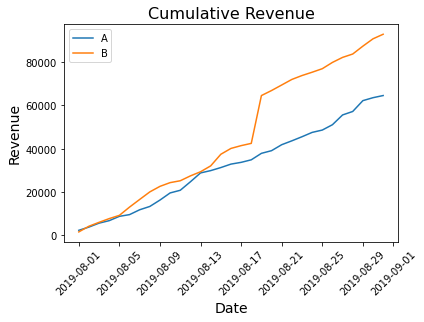

In [ ]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]


plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')

plt.xticks(rotation=45)
plt.title('Cumulative Revenue', size=16)
plt.xlabel('Date', size=14)
plt.ylabel('Revenue', size=14)
plt.legend()
plt.show() 

Dari grafik diatas pendapatan grup B lebih tinggi. Salah satu penyebabnya adalah grup B mengalami lonjakan pendapatan disekitar tanggal 17 hingga 21 agustus 2019.

### Pesanan Rata-Rata Kumulatif Berdasarkan Kelompok 

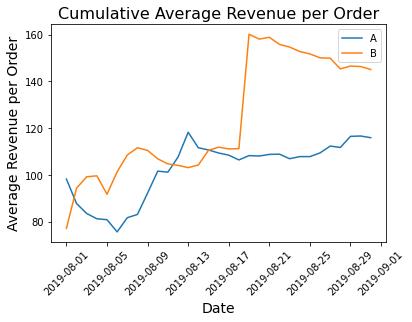

In [ ]:
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')

plt.xticks(rotation=45)
plt.title('Cumulative Average Revenue', size=16)
plt.xlabel('Date', size=14)
plt.ylabel('Average Revenue per Order', size=14)
plt.legend()
plt.show() 

Dari grafik diatas pendapatan grup B lebih tinggi. Pada grafik diatas juga kembali terlihat peningkatan rata-rata pendapatan per pesanan terjadi pada periode sekitar tanggal 17 hingga 21 Agustus 2019. 

### Perbedaan Relatif Pesanan Rata-Rata kumulatif Kelompok B Dibandingkan Dengan Kelompok A

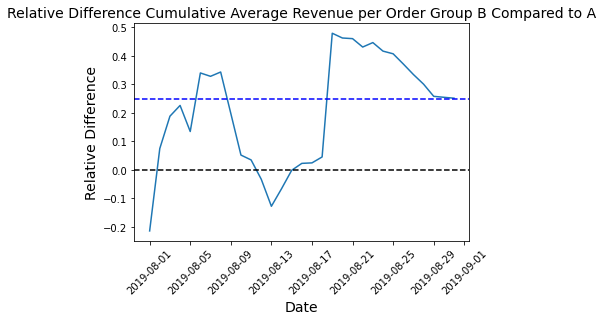

In [ ]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, on='date', how='left', suffixes=['A', 'B'])
plt.plot(
    mergedCumulativeRevenue['date'], 
    (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1
)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.25, color='blue', linestyle='--')  

plt.xticks(rotation=45)
plt.title('Relative Difference of Cumulative Average Revenue of Group B Compared to A', size=14)
plt.xlabel('Date', size=14)
plt.ylabel('Relative Difference', size=14)
plt.show() 

Dari analisa diatas memperlihatkan bahwa rata-rata pendapatan per pesanan kelompok B lebih tinggi `25%` dibandingkan dengan grup `A`. Hal ini karena peningkatan pesanan dan pendaptan pada grup B  yang terjadi sekitar tanggal 17 hingga 21 Agustus 2019.  

### Tingkat Konversi Setiap Kelompok 

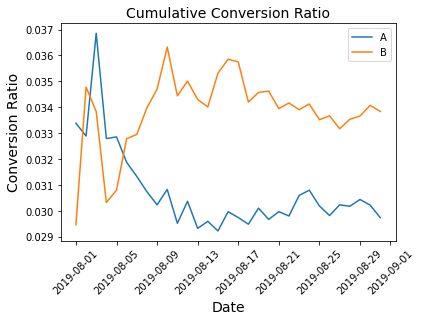

In [ ]:

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']

cumulativeDataA = cumulativeData.loc[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData.loc[cumulativeData['group']=='B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')

plt.xticks(rotation=45)
plt.title('Cumulative Conversion Ratio', size=14)
plt.xlabel('Date', size=14)
plt.ylabel('Conversion Ratio', size=14)
plt.legend()
plt.show()

Seperti analisa sebelumnya, pada niai rasio konversi grup A juga memiliki nilai lebih tinggi dibandingkan grup B. Namun yang menarik hal tersebut tidak langsung terjadi. Bahkan grup A sempat memimpin dengan nilai rasio konversi tertinggi sebesar `3.7%`. Namun setelah tanggal 5, grup B mulai naik dan grup A sebaliknya. Sehingga kemudia grup B terus memimpin hingga akhir.   

### Diagram Tebar Jumlah Pesanan Per Pengguna

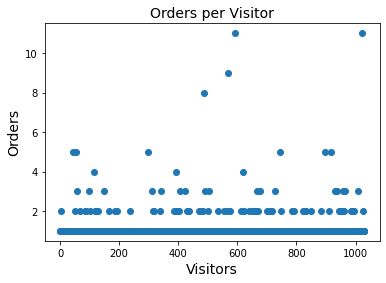

In [ ]:
orders.head()
orders_per_visitor = orders.groupby('visitorId').agg({'transactionId':'nunique'}).reset_index()
orders_per_visitor.columns = ['visitorId', 'orders']

x_values = pd.Series(range(0, len(orders_per_visitor['orders'])))
plt.scatter(x_values, orders_per_visitor['orders'])


plt.title('Orders per Visitor', size=14)
plt.xlabel('Visitors', size=14)
plt.ylabel('Orders', size=14)
plt.show()

Ternyata umumnya pelanggan berbelanja satu hingga dua pesanan. Hanya ada beberapa pelanggan yang memiliki lebih dari 4 pesanan. Mungkin pelanggan-pelanggan tersebut tergabung kedalam grup B yang menyebabkan terjadinya lonjakan pesanan pada sekitar tanggal 17 hingga 21 agustus 2019.

### Persentil 95 dan 99 dari Jumlah Pesanan per Pengguna

In [ ]:
np.percentile(orders_per_visitor['orders'], [95, 99])

array([2., 4.])

Ternyata `95%` pelanggan membuat 2 pesanan. Dari hasil persentil tersebut saya artikan pelanggan yang memiliki pesanan lebih dari dua sebagai `anomali`.

### Diagram Tebar Harga Pesanan

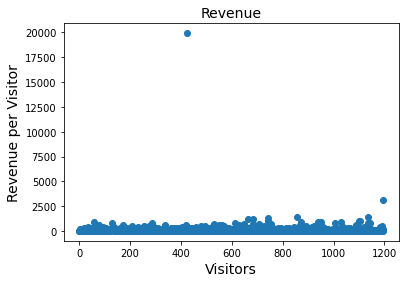

In [ ]:
x_values = pd.Series(range(0, len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])


plt.title('Revenue', size=14)
plt.xlabel('Visitors', size=14)
plt.ylabel('Revenue per Visitor', size=14)
plt.show()

Dari data diatas sebagian sekilas terlihat umumnya nilai harga pesanan yang ditransaksikan pelanggan dibawah `$2,500`. Namun ada satu pelanggan memiliki pesanan sangat besar, yaitu `$20,000`. Nilai tersebut sangat jauh diatas nilai pesanan pelanggan pada umumnya.

### Persentil 95 dan 99 Harga Pesanan

In [ ]:
np.percentile(orders['revenue'], [95, 99])

array([435.54 , 900.904])

Ternyata sebagian besar pelanggan nilai belanjanya per pesanan jauh dari `$2,500`. `95%` pelanggan berbelanja senilai `$435.54`. Dari data persentil tersebut maka pesanan yang nilainya diatas  `$435.54` dapat dianggap anomali.

### Perbedaan Konversi Antar Kelompok 

In [ ]:
ordersByUsersA = orders.loc[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders.loc[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat(
    [ordersByUsersA['orders'],
     pd.Series(0, index=np.arange(visitors.loc[visitors['group']=='A', 'visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],
axis=0)

sampleB = pd.concat(
    [ordersByUsersB['orders'],
     pd.Series(0, index=np.arange(visitors.loc[visitors['group']=='B', 'visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],
axis=0)

alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)

print('Pvaluenya adalah: '+'{0:.3f}'.format(results.pvalue))
print('Perbedaan relatif nilai konversi antara Kelompok B dengan A adalah '+ '{0:.1f}'.format((sampleB.mean()/sampleA.mean()-1)*100)+'%') 

if (results.pvalue < alpha):
  print('H0 ditolak: Ada Perbedaan Nilai Konversi yang Signifikan antara Kelompok A dengan B')
else:
  print('Gagal Menolak H0: Tidak Ada Perbedaan Nilai Konversi yang Signifikan antara Kelompok A dengan B')

Pvaluenya adalah: 0.017
Perbedaan relatif antara Kelompok B dengan A adalah 13.8%
H0 ditolak: Ada Perbedaan Nilai Konversi yang Signifikan antara Kelompok A dengan B


Berdasarkan hasil uji statistiknya sebesar 0.017, nilainya lebih kecil dari nilai alpha `0.05`. Artinya menolak `H0` dan ada perbedaan yang signifikan secara statistik antara nilai konversi kelompok `A` dibandingkan kelompok `B`. Dan peningkatan nilai konversi kelompok `B` adalah `13.8%` dibandingkan kelompok `A`.

Hasil ini menguatkan hasil analisa dan visualisasi yang telah dilakukan sebelumnya yang menunjukan konversi kumulatif kelompok `B` jauh diatas `A`.

### Perbedaan Ukuran Pesanan Rata-Rata Antar Kelompok

In [ ]:
revByUsersA = orders.loc[orders['group']=='A', ['visitorId', 'revenue']]
revByUsersB = orders.loc[orders['group']=='B', ['visitorId', 'revenue']]

sampleRevA = revByUsersA['revenue'].squeeze()
sampleRevB = revByUsersB['revenue'].squeeze()

results_rev = stats.mannwhitneyu(sampleRevA, sampleRevB)

print('Pvaluenya adalah: '+'{0:.3f}'.format(results_rev.pvalue))
print('Perbedaan relatif ukuran pesanan rata-rata antara Kelompok B dengan A adalah '+ '{0:.1f}'.format((sampleRevB.mean()/sampleRevA.mean()-1)*100)+'%') 

if (results.pvalue < alpha):
  print('H0 ditolak: Ada Perbedaan Ukuran Pesanan Rata-Rata yang Signifikan antara Kelompok A dengan B')
else:
  print('Gagal Menolak H0: Tidak Ada Perbedaan Ukuran Pesanan Rata-Rata yang Signifikan antara Kelompok A dengan B')

Pvaluenya adalah: 0.692
Perbedaan relatif ukuran pesanan rata-rata antara Kelompok B dengan A adalah 25.2%
Gagal Menolak H0: Tidak Ada Perbedaan Ukuran Pesanan Rata-Rata yang Signifikan antara Kelompok A dengan B


Berdasarkan hasil uji statistiknya sebesar 0.692, nilainya lebih besar dari nilai alpha `0.05`. Artinya gagal menolak `H0` namun, tetap ada peningkatan nilai rata-rata ukuran pesanan kelompok `B` sebesar `25.2%` dibandingkan kelompok `A`.

Hasil ini manjadi catatan, karena meskipun perbedaan nilai konversinya signifikan namun tidak dengan ukuran rata-rata pesanannya. Hal ini mungkin disebabkan karena masih adanya nilai anomali. Hal ini akan saya periksa pada tahap selanjutnya.  

### Perbedaan Konversi Antar Kelompok Tanpa Nilai Anomali

Dalam tahap ini, saya akan memfilter data dari pelanggan yang pesanannya diatas 4 dan nilai pesananya diatas `$435.54`. Karena itu sebelum memulai analisa, saya membutuhkan daftar pelanggan yang masuk kedalam kedua kriteria diatas. 

In [ ]:
usersWithManyOrders = pd.concat(
    [
      ordersByUsersA.loc[ordersByUsersA['orders'] > 2, 'visitorId'], 
      ordersByUsersB.loc[ordersByUsersB['orders'] > 2, 'visitorId']
    ], 
axis = 0)

usersWithExpensiveOrders = orders.loc[orders['revenue'] > 435.54, 'visitorId']

abnormalUsers = pd.concat(
    [usersWithManyOrders, usersWithExpensiveOrders]
).drop_duplicates().sort_values()

abnormalUsers

1099     148427295
18       199603092
928      204675465
23       237748145
37       249864742
           ...    
723     4009017467
627     4120364173
743     4133034833
499     4256040402
662     4266935830
Name: visitorId, Length: 74, dtype: int64

Datanya sudah terkumpul dan hasilnya ada 74 pelanggan yang memiliki order diatas 4 dan nilai pesanan diatas `$435.54`.

In [ ]:
sampleAFiltered = pd.concat(
    [
      ordersByUsersA.loc[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers)), 'orders'],
      pd.Series(0, index=np.arange(visitors.loc[visitors['group']=='A', 'visits'].sum() - len(ordersByUsersA['orders'])),name='orders')
    ],
axis=0)


sampleBFiltered = pd.concat(
    [
      ordersByUsersB.loc[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers)), 'orders'],
      pd.Series(0, index=np.arange(visitors.loc[visitors['group']=='B', 'visits'].sum() - len(ordersByUsersB['orders'])),name='orders')
    ],
axis=0)

results_filtered = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)

print('Pvaluenya adalah: '+'{0:.3f}'.format(results_filtered.pvalue))
print('Perbedaan relatif nilai konversi antara Kelompok B dengan A adalah '+ '{0:.1f}'.format((sampleBFiltered.mean()/sampleAFiltered.mean()-1)*100)+'%') 

if (results.pvalue < alpha):
  print('H0 ditolak: Ada Perbedaan Nilai Konversi yang Signifikan antara Kelompok A dengan B')
else:
  print('Gagal Menolak H0: Tidak Ada Perbedaan Nilai Konversi yang Signifikan antara Kelompok A dengan B')

Pvaluenya adalah: 0.013
Perbedaan relatif nilai konversi antara Kelompok B dengan A adalah 17.3%
Gagal Menolak H0: Tidak Ada Perbedaan Nilai Konversi yang Signifikan antara Kelompok A dengan B


setelah dilakukan uji statistik, ternyata nilai signifikasinya `0.013` yang artinya menolak `H0` karena dibawah nilai alpha `0.05`. Nilai tersebut lebih kecil dibandingkan sebelum datanya difilter. 

Hal ini diikuti dengan meningkatnya nilai konversi relatif kelompok B dengan kelompok A, dari yang sebelum difilter `13.8%` jadi meningkat ke `17.3%`. Peningkatan terjadi diduga karena adanya pelanggan dari kelompok A yang memiliki jumlah pembelian yang anomali yang difilter.

### Perbedaan Ukuran Pesanan Rata-Rata Antar Kelompok Tanpa Nilai Anomali

In [ ]:
revAFiltered = revByUsersA.loc[
    np.logical_not(revByUsersA['visitorId'].isin(abnormalUsers)),
    'revenue'
].squeeze()


revBFiltered = revByUsersB.loc[
    np.logical_not(revByUsersB['visitorId'].isin(abnormalUsers)),
    'revenue'
].squeeze()

results_rev = stats.mannwhitneyu(revAFiltered, revBFiltered)

print('Pvaluenya adalah: '+'{0:.3f}'.format(results_rev.pvalue))
print('Perbedaan relatif ukuran pesanan rata-rata antara Kelompok B dengan A adalah '+ '{0:.1f}'.format((revBFiltered.mean()/revAFiltered.mean()-1)*100)+'%') 

if (results.pvalue < alpha):
  print('H0 ditolak: Ada Perbedaan Ukuran Pesanan Rata-Rata yang Signifikan antara Kelompok A dengan B')
else:
  print('Gagal Menolak H0: Tidak Ada Perbedaan Ukuran Pesanan Rata-Rata yang Signifikan antara Kelompok A dengan B')

Pvaluenya adalah: 0.788
Perbedaan relatif ukuran pesanan rata-rata antara Kelompok B dengan A adalah -1.9%
Gagal Menolak H0: Tidak Ada Perbedaan Ukuran Pesanan Rata-Rata yang Signifikan antara Kelompok A dengan B


Berdasarkan hasil uji statistiknya adalah sebesar 0.788, nilainya lebih besar dari nilai alpha `0.05`. Artinya gagal menolak `H0` dan ada sedikit penurunan nilai rata-rata ukuran pesanan kelompok `B` sebesar `-1.9%` dibandingkan kelompok `A`.

Saya menduga ada beberapa pelanggan kelompok B yang memiliki nilai pembelian yang anomali. Sehingga setelah nilai anomalinya difilter, hasilnya adalah pebedaan relatifnya turun lebih dari `25%`. Pelanggan-pelanggan dengan ukuran pesanan yang `anomali` tersebut mungkin yang membuat lonjakan pendapatan kumulatif di sekitar tanggal 17 hingga 21 Agustus 2019. 

Namun hal tersebut tidak perlu dikhawatirkan secara berlebihan, kerena setelah diuji statistik perbedaanya tidak signifikan. 

### Keputusan berdasarkan Hasil Pengujian

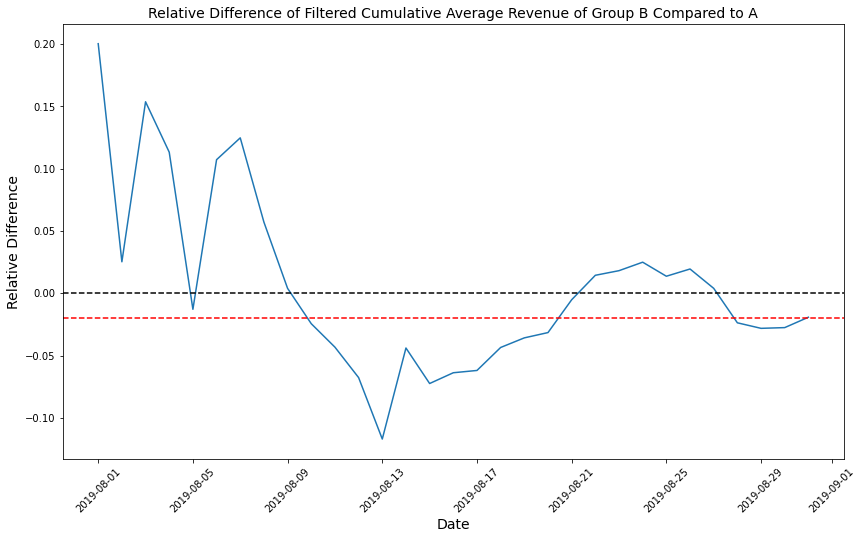

In [ ]:
datesGroups = orders.loc[:, ['date','group']].drop_duplicates()

orders_filtered = orders.loc[
    np.logical_not(orders['visitorId'].isin(abnormalUsers))
]

ordersAggregated_fitered = datesGroups.apply(
    lambda x: orders_filtered.loc[np.logical_and(orders_filtered['date'] <= x['date'], orders_filtered['group'] == x['group'])]
    .agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1
).sort_values(by=['date','group'])

cumulativeData_filtered = ordersAggregated_fitered.merge(visitorsAggregated, on=['date', 'group'])
cumulativeData_filtered.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
cumulativeData_filtered['conversion'] = cumulativeData_filtered['orders']/cumulativeData_filtered['visitors']
cumulativeData_filtered.head()

cumulativeData_f_a = cumulativeData_filtered.loc[cumulativeData_filtered['group'] == 'A', ['date', 'revenue','orders', 'conversion']]
cumulativeData_f_b = cumulativeData_filtered.loc[cumulativeData_filtered['group'] == 'B', ['date', 'revenue','orders', 'conversion']]

mergedCumulative_f = cumulativeData_f_a.merge(cumulativeData_f_b, on='date', how='left', suffixes=['A', 'B'])

f = plt.figure()
f.set_figwidth(14)
f.set_figheight(8)

plt.plot(
    mergedCumulative_f['date'], 
    (mergedCumulative_f['revenueB']/mergedCumulative_f['ordersB'])/(mergedCumulative_f['revenueA']/mergedCumulative_f['ordersA'])-1
)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.02, color='red', linestyle='--')  

plt.xticks(rotation=45)
plt.title('Relative Difference of Filtered Cumulative Average Revenue of Group B Compared to A', size=14)
plt.xlabel('Date', size=14)
plt.ylabel('Relative Difference', size=14)
plt.show() 

Berdasarkan dari grafik diatas, memperlihatkan bahwa pembelian kumulatif rata-rata grup B lebih rendah sekitar `2%` dibandingkan grup A. Hasilnya kurang lebih serupa dengan pengujian  sebelumnya. 

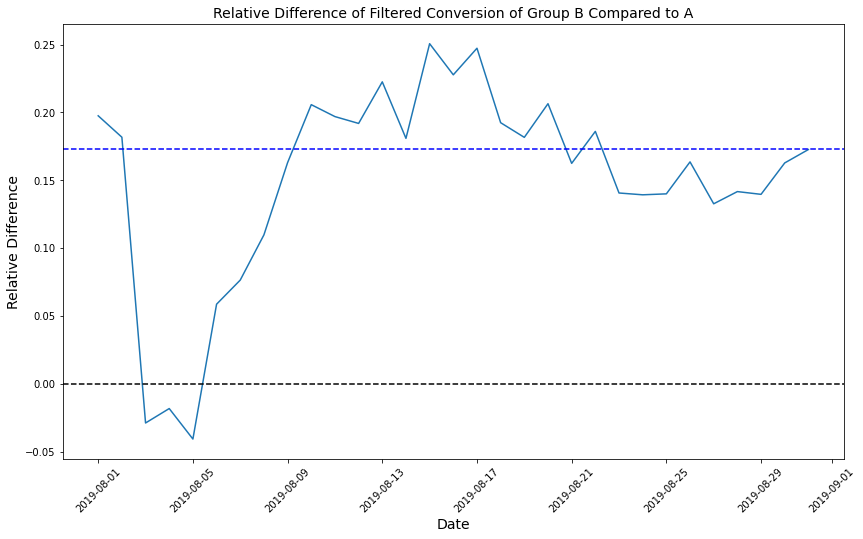

In [ ]:
f = plt.figure()
f.set_figwidth(14)
f.set_figheight(8)

plt.plot(
    mergedCumulative_f['date'], 
    (mergedCumulative_f['conversionB'])/(mergedCumulative_f['conversionA'])-1
)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.173, color='blue', linestyle='--')  

plt.xticks(rotation=45)
plt.title('Relative Difference of Filtered Conversion of Group B Compared to A', size=14)
plt.xlabel('Date', size=14)
plt.ylabel('Relative Difference', size=14)

plt.show() 

Berdasarkan dari grafik diatas, memperlihatkan bahwa pembelian nilai grup B lebih meningkat sekitar `17%` dibandingkan grup A. Hasilnya kurang lebih serupa dengan pengujian sebelumnya.  

Setelah dilakukan beberapa pengujian ada beberapa poin yang didapatkan. Berikut poin-poin yang saya tangkap:
- Sebagian besar pelanggan paling banyak membuat `2` pesanan, hanya sebagian kecil yang membuat pesanan diatas `2`.
- Sebagian besar pelanggan memiliki ukuran pesanan paling besar `$435.54`, hanya sebagian kecil pelanggan yang memiliki ukuran pesanan diatas itu. 
- Pelanggan-pelanggan yang memiliki jumlah pesanan atau ukuran pesanan diatas nilai tersebut dianggap `outlier` atau `anomali`.
- Pada kelompok A diduga lebih banyak pelanggan dengan jumlah pesanan yang `anomali` dan pada kelompok B diduga lebih banyak pelanggan dengan ukuran pesanan yang `anomali`. 
- Setelah dilakukan beberapa kali pengujian ternyata nilai-nilai `outlier` tersebut dapat membiaskan penilaian jika tidak difilter.

Dan dari pengujian akhir setelah menyingkirkan data yang `anomali` menunjukan bahwa dari segi nilai `konversi`, kelompok B lebih tinggi dibandingkan A. 

Namun hal tersebut tidak diikuti dengan ukuran pesanannya. Ukuran pesanan kelompok B sedikit lebih rendah dibandingkan kelompok A, tetapi secara statistik tidak signifikan. 

Dilihat dari grafik perbedaan relatif nilai konversi dan ukuran pesanan terlihat fluktuasinya sudah mulai stabil dan jika dilanjutkan saya menduga hasilnya tidak berubah banyak. 

Berdasarkan dari pengujian dan pertimbangan diatas saya menyarankan untuk menghentikan pengujian dan memilih kelompok B sebagai pemimpin. Karena meskipun dari rata-rata ukuran pesanan tidak meningkat, namun nilai konversinya meningkat cukup tinggi dan dikuatkan juga dengan hasil statistik. Dengan kondisi tersebut maka saya meyakini peningkatan nilai konversi tersebut akan meningkatkan pendapatan perusahaan kedepannya.